In [2]:
from time import sleep
import numpy as np
import urllib3
import matplotlib
from numpy import append
import config
import vectorbt as vbt
import pandas as pd
import pandas_ta as ta
from datetime import datetime
from alpaca_trade_api.rest import REST
import gym
import gym_anytrading
from tensorflow.keras.models import load_model
import requests

from stable_baselines import ACKTR
from stable_baselines.common.evaluation import evaluate_policy

c:\Users\90507\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\90507\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\90507\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\90507\AppD

119

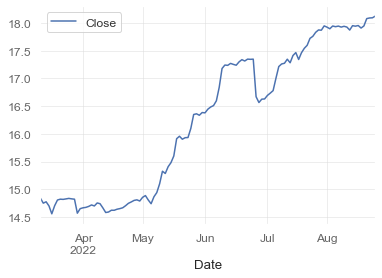

In [2]:
data = vbt.YFData.download(symbols= 'TRY=X', period="119d")
#df = vbt.Portfolio.from_holding(data, init_cash=100)
#print(data.data['TRYUSD=X']['Close'])
X=data.data['TRY=X'].index
Y=data.data['TRY=X'].Close
data.data['TRY=X'].reset_index().plot(x='Date', y='Close')
X=data.data['TRY=X']
liraDF = pd.DataFrame( X['Close'])
LiraArray = np.array(liraDF)
liraDF.size

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
testingSet = pd.DataFrame(liraDF)
testing_set_scaled = sc.fit_transform(testingSet)
testing_set_scaled

array([[0.07859305],
       [0.05389412],
       [0.06087165],
       [0.0400852 ],
       [0.        ],
       [0.0407897 ],
       [0.06985293],
       [0.07402933],
       [0.07306386],
       [0.07542147],
       [0.07803175],
       [0.07567388],
       [0.07393378],
       [0.00316328],
       [0.0261106 ],
       [0.03037399],
       [0.03257448],
       [0.03747492],
       [0.04488473],
       [0.03974553],
       [0.05493267],
       [0.05114358],
       [0.02992512],
       [0.00660146],
       [0.00915553],
       [0.01816492],
       [0.01791251],
       [0.02327307],
       [0.02638871],
       [0.03054236],
       [0.04098055],
       [0.05308015],
       [0.06004081],
       [0.06784329],
       [0.07067815],
       [0.06480929],
       [0.08333637],
       [0.09226144],
       [0.06983607],
       [0.05100332],
       [0.08619344],
       [0.10725772],
       [0.15167913],
       [0.2154049 ],
       [0.20416425],
       [0.23823739],
       [0.25883835],
       [0.292

In [4]:
inputs = liraDF[0:].values     #lstm input shape edit
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,liraDF.size):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
#X_test = np.reshape(X_test, (X_test.shape[0], 1))
#X_test = np.reshape(X_test, (int(X_test.size/60), 60,1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

C:\Users\90507\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [5]:
X_test

array([[[0.07859305],
        [0.05389412],
        [0.06087165],
        ...,
        [0.51236619],
        [0.51074681],
        [0.52926291]],

       [[0.05389412],
        [0.06087165],
        [0.0400852 ],
        ...,
        [0.51074681],
        [0.52926291],
        [0.54043317]],

       [[0.06087165],
        [0.0400852 ],
        [0.        ],
        ...,
        [0.52926291],
        [0.54043317],
        [0.54750599]],

       ...,

       [[0.49855728],
        [0.51236619],
        [0.51074681],
        ...,
        [0.93975469],
        [0.95035   ],
        [0.98759473]],

       [[0.51236619],
        [0.51074681],
        [0.52926291],
        ...,
        [0.95035   ],
        [0.98759473],
        [0.99070983]],

       [[0.51074681],
        [0.52926291],
        [0.54043317],
        ...,
        [0.98759473],
        [0.99070983],
        [0.99160812]]])

In [6]:
lira_model = load_model('Lira_BOT.bot')
predicted_close_value = lira_model.predict(X_test)
predicted_close_value = sc.inverse_transform(predicted_close_value)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
predicted_close_value = pd.DataFrame(predicted_close_value)
predicted_close_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       59 non-null     float32
dtypes: float32(1)
memory usage: 364.0 bytes


In [8]:
test_data = liraDF[60:]
real_close_value = test_data.iloc[0:60].values
#real_close_value = liraDF[60:]

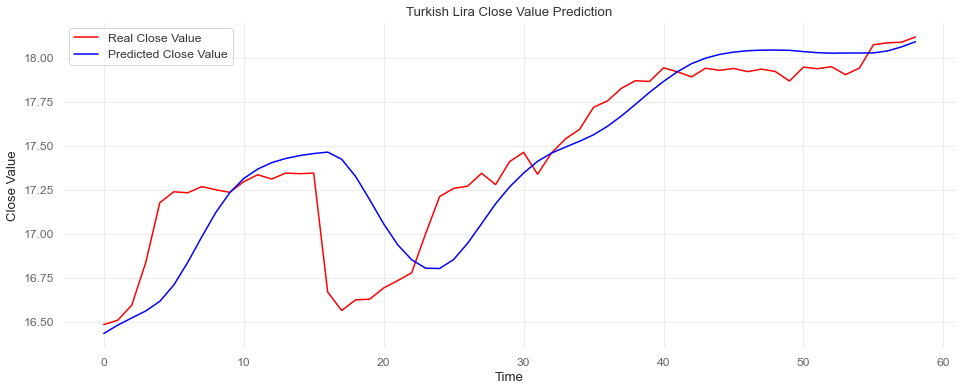

In [9]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_figwidth(16)
figure.set_figheight(6)
plt.plot(real_close_value, color='red', label='Real Close Value')
plt.plot(predicted_close_value, color='blue', label='Predicted Close Value')
plt.title('Turkish Lira Close Value Prediction')
plt.xlabel('Time')
plt.ylabel('Close Value')
plt.legend()
plt.show()

In [10]:
from scipy.stats import pearsonr
from pingouin import corr
from researchpy.correlation import corr_case

In [11]:
result = pd.DataFrame(real_close_value)
result.insert(1,"Predicted", pd.DataFrame(predicted_close_value))
result.columns=["Real","Predicted"]
print("Correlation Between Real and Predicted Values = %",100*result["Real"].corr(result["Predicted"],method="pearson"))
accuracy = 100 * np.mean(np.abs(real_close_value-predicted_close_value) / real_close_value)
print("Percentage of Accuracy Between Real and Predicted Values = %01.3f" %(100 - accuracy,))

Correlation Between Real and Predicted Values = % 85.28067618613767
Percentage of Accuracy Between Real and Predicted Values = 98.941


In [12]:
predictions_TRY = predicted_close_value
%store -r predictions_SOL

In [13]:
predictions_all = np.array([predictions_TRY,predictions_SOL])

In [14]:
for i in range(1,len(predictions_all[0])):
    predictions_all[0][i] = 100 * (predictions_all[0][i] - predictions_all[0][i-1]) / predictions_all[0][i-1]
    predictions_all[1][i] = 100 * (predictions_all[1][i] - predictions_all[1][i-1]) / predictions_all[1][i-1]

In [15]:
predictions_all[0] = predictions_all[0] * 0.488 * 0.71 / 1.56
predictions_all[1] = predictions_all[1] * 0.369 * 0.86 / 1.56

In [16]:
changes_all = np.array([predictions_all[0][1:], predictions_all[1][1:]])
print(changes_all[0][0]," *** ",changes_all[1][0])

[0.06429051]  ***  [-0.10176503]


In [3]:
latest_eth = vbt.YFData.download(symbols= 'ETH-USD', period="60d").get('Close')

buffer = requests.get("https://ethgasstation.info/json/ethgasAPI.json")#latest_eth * vbt.YFData.download(symbols= 'GAS-ETH', period="60d").get('Close')
str_temp = str.split(buffer.text,',')
str_temp[0] = str_temp[0][1:]
columnNames = []
numbers = np.array([])
for i in range(4):
    temp = str.split(str_temp[i],'"')
    temp[2] = temp[2][1:]
    columnNames.append(temp[1])
    numbers = np.append(numbers,temp[2])
numbers = np.reshape(numbers, (1,4))

#data = pd.DataFrame(columns=columnNames, data=numbers)
print(int(numbers[0][3]))
latest_gas = (int(numbers[0][3]) *25000) / 10e8

300


In [4]:
print(str_temp)

['"fast":360', '"fastest":390', '"safeLow":270', '"average":300', '"block_time":14.88888888888889', '"blockNum":14460251', '"speed":0.5814697672270163', '"safeLowWait":16.1', '"avgWait":3', '"fastWait":0.5', '"fastestWait":0.5', '"gasPriceRange":{"4":248.2', '"6":248.2', '"8":248.2', '"10":248.2', '"20":248.2', '"30":248.2', '"40":248.2', '"50":248.2', '"60":248.2', '"70":248.2', '"80":248.2', '"90":248.2', '"100":248.2', '"110":248.2', '"120":248.2', '"130":248.2', '"140":248.2', '"150":248.2', '"160":248.2', '"170":248.2', '"180":248.2', '"190":248.2', '"210":248.2', '"230":248.2', '"250":248.2', '"270":16.1', '"290":4.6', '"300":3', '"310":2', '"330":1.3', '"350":0.6', '"360":0.5', '"370":0.5', '"390":0.5}}']


In [18]:
buy_sel_signal = np.array([])
one_hundred_dollar = (100 + latest_gas * latest_eth[0]) / latest_eth[0]
for i in range(len(changes_all[0])):
    one_hundred_dollar = (100+latest_gas * latest_eth[i]) / latest_eth[i]
    if(changes_all[0][i] * changes_all[1][0] > 0):
        if(np.abs((changes_all[0][i] + changes_all[1][i])/2) >= one_hundred_dollar):
            if(changes_all[0][i] < 0):
                buy_sel_signal = np.append(buy_sel_signal, -1)
            else:
                buy_sel_signal = np.append(buy_sel_signal, 1)
        else:
            buy_sel_signal = np.append(buy_sel_signal, 0)
    else:
        buy_sel_signal = np.append(buy_sel_signal,0)

In [19]:
total_eth = 10000 / latest_eth[0]
total_money = 10000
position = []
for i in range(len(buy_sel_signal)):
    if buy_sel_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
    
for i in range(len(buy_sel_signal)):
    if buy_sel_signal[i] == 0 :
        position[i] = 1
    elif buy_sel_signal[i] == -1  or buy_sel_signal[i] == 1:
        position[i] = 0
    else:
        position[i] = position[i-1]

In [20]:
total_records = np.array([buy_sel_signal,buy_sel_signal])
for i in range(len(buy_sel_signal)):
    total_records[0][i] = total_money
    total_records[1][i] = total_eth
    one_hundred_dollar = (100+latest_gas * latest_eth[i]) / latest_eth[i]
    if(buy_sel_signal[i]!=0 and position[i]!=1):
        if(buy_sel_signal[i]==1):
            total_eth +=  one_hundred_dollar
            total_money = total_money - 100 - latest_gas * latest_eth[i]
        elif(buy_sel_signal[i]==-1):
            total_eth -=  one_hundred_dollar
            total_money = total_money + 100 - latest_gas * latest_eth[i]

In [21]:
print(total_money," *** ",total_eth * latest_eth[-1])
print(" ***** ")
print(total_records[0][4:8], " *** ", total_records[1][4:8])

14969.609760131836  ***  6776.440640091604
 ***** 
[10183.17357697 10275.16883575 10367.22058075 10459.22173462]  ***  [8.14113768 8.03994321 7.93808287 7.83681935]


In [22]:
print("Starting Money = $10K")
print("Starting Ethereum = ",(10000 / latest_eth[0]),"ETH")
print("Last Total Money = ", total_money+(total_eth*latest_eth[-1]))
profit = 100 * (total_money+(total_eth*latest_eth[-1]) -20000) / 20000
print("Profit = %",profit)

Starting Money = $10K
Starting Ethereum =  8.334502490125924 ETH
Last Total Money =  21746.05040022344
Profit = % 8.730252001117204
